In [192]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [194]:
real_estate = pd.read_csv("Data\\realEstate.csv")

In [195]:
land = pd.read_excel("Data\Riyadh_Aqqar.xlsx", sheet_name="Land (الاراضي)")

In [196]:
aqqar_villas2=pd.read_csv("Data\RiyadhVillasAqar.csv")

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\1665608749.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  aqqar_villas2=pd.read_csv("Data\RiyadhVillasAqar.csv")


In [197]:
# pd.set_option('display.max_rows', None)

### Viewing the dataframe

In [199]:
land.head()

نوع العقار الغرض              المدينة                الحي     الواجهة  \
0        أرض   NaN   امارة منطقة الرياض             الرياض        غربية   
1        أرض   NaN              الرياض           حي غرناطة       شمالية   
2        أرض  سكني              الرياض           حي غرناطة   ثلاث شوارع   
3        أرض  سكني              الرياض          حي اليرموك   ثلاث شوارع   
4        أرض  سكني              الرياض    حي النسيم الغربي        غربية   

   المساحة  سعر المتر  السعر الإجمالي  
0      375     2900.0         1087500  
1      800     4800.0         3840000  
2     1650     4800.0         7920000  
3     1650     4800.0         7920000  
4      750     3200.0         2400000

In [200]:
real_estate.head()

user_id       id                                              title  price  \
0  1495817  4596035  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
1   496663  4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   
2  2412431  4554519  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...  22000   
3  1906500  4120004  شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...  38000   
4  1741562  4498954  شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...  25000   

                                             content  \
0                                        1666 كل شهر   
1  شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   
2  شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...   
3  شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...   
4  غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...   

                                                imgs  \
0  ['014958174_1659666836308.jpg', '014958178_165...   
1  ['004966630_1659781493595.jpg', '004966636_165...   
2  ['023243548_1658701693777.jpg', '023243549_165...   
3  ['019065004_1659758037501.jpg', '019065000_165...   
4  ['017415629_1657025837185.jpg', '017415620_165...   

                      refresh  beds  livings  wc  ...  width  length  \
0  ['2022-08-06', '12:22:15']     3      0.0   2  ...   15.0    15.0   
1  ['2022-08-06', '10:27:57']     3      1.0   2  ...    NaN     NaN   
2  ['2022-08-06', '06:59:03']     3      1.0   2  ...   10.0    20.0   
3  ['2022-08-06', '03:52:58']     1      1.0   1  ...    NaN     NaN   
4  ['2022-08-03', '10:53:47']     1      1.0   1  ...    7.0     9.0   

      advertiser_type                 create_time  review  profileImg  \
0               owner  ['2022-08-05', '02:44:23']    5.00         NaN   
1  exclusive_marketer  ['2022-08-06', '10:27:56']    4.33         yes   
2     normal_marketer  ['2022-07-24', '22:27:27']    4.67         NaN   
3               owner  ['2022-03-10', '09:17:01']    4.17         NaN   
4     normal_marketer  ['2022-07-05', '13:03:54']    4.42         NaN   

                    UserName iam_verified onMarket IsRent  
0                    Thamer          True       17  False  
1   الاركان الثابته للعقارات         True        5   True  
2         مكتب منزلك الفاخر          True       15   True  
3                  ابو مصطفى         True      165  False  
4              عقار المستقبل         True       48  False  

[5 rows x 30 columns]

In [201]:
aqqar_villas2.head(2)

Unnamed: 0  front  rooms lounges bathrooms  streetWidth  stairs  \
0           0  شرقية      5       4        5+         20.0       1   
1           1  غربية      4       3        5+         20.0       1   

   propertyAge  driverRoom  tent  ...  apartments  maidRoom  elevator  \
0            0           1     1  ...           0         0         0   
1            0           1     1  ...           2         1         1   

   furnihsed  pool  basement neighbourhood     location      price  \
0          0     0         0         عكاظ   جنوب الرياض  1050000.0   
1          0     0         0      المهدية    غرب الرياض  3000000.0   

   square price  
0   3500.000000  
1   5555.555556  

[2 rows x 26 columns]

## 1. Data Profiling:

In [203]:
land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [204]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [205]:
aqqar_villas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [206]:
land.shape

(2155, 8)

In [207]:
real_estate.shape

(6762, 30)

In [208]:
aqqar_villas2.shape

(46826, 26)

In [209]:
land.describe()

المساحة      سعر المتر  السعر الإجمالي
count    2155.000000    2155.000000    2.155000e+03
mean     1568.780510    4356.648574    5.050271e+06
std      9757.996967   35214.809640    3.141799e+07
min         1.000000      90.000000    1.400000e+03
25%       413.000000    1365.000000    7.810000e+05
50%       670.000000    2570.000000    1.442000e+06
75%       900.000000    4000.000000    3.150000e+06
max    299684.000000  945000.000000    8.930250e+08

In [210]:
real_estate.describe()

user_id            id          price         beds      livings  \
count  6.762000e+03  6.762000e+03    6762.000000  6762.000000  6760.000000   
mean   1.325257e+06  4.475689e+06   43274.639899     2.569802     0.990680   
std    8.326004e+05  1.934656e+05   28860.914338     1.117260     0.461318   
min    7.000000e+00  2.118990e+05      55.000000     1.000000     0.000000   
25%    5.809750e+05  4.446396e+06   25000.000000     2.000000     1.000000   
50%    1.203756e+06  4.528259e+06   35000.000000     3.000000     1.000000   
75%    2.072661e+06  4.573634e+06   55000.000000     3.000000     1.000000   
max    2.685054e+06  4.600241e+06  450000.000000     7.000000     5.000000   

                wc          area  street_width          age      ketchen  \
count  6762.000000  6.587000e+03   6552.000000  6057.000000  6745.000000   
mean      2.066105  1.880134e+03     23.141331     2.862968     0.869978   
std       0.928238  1.369202e+05     13.793542     4.657175     0.336353   
min       1.000000  0.000000e+00      0.000000     0.000000     0.000000   
25%       1.000000  9.800000e+01     15.000000     0.000000     1.000000   
50%       2.000000  1.450000e+02     20.000000     1.000000     1.000000   
75%       3.000000  1.800000e+02     30.000000     4.000000     1.000000   
max       5.000000  1.111110e+07    100.000000    36.000000     1.000000   

                ac    furnished        width         length       review  \
count  6743.000000  6717.000000  4662.000000    4662.000000  6363.000000   
mean      0.722379     0.078160    17.850322      47.169254     4.344400   
std       0.447859     0.268443    35.434895    1627.623997     0.481803   
min       0.000000     0.000000     1.000000       1.000000     1.000000   
25%       0.000000     0.000000     8.000000       9.000000     4.200000   
50%       1.000000     0.000000    11.000000      12.000000     4.380000   
75%       1.000000     0.000000    15.000000      18.000000     4.560000   
max       1.000000     1.000000  1000.000000  111111.000000     5.000000   

          onMarket  
count  6762.000000  
mean     49.796066  
std      71.213069  
min       1.000000  
25%      19.000000  
50%      32.000000  
75%      61.000000  
max    2279.000000

In [211]:
aqqar_villas2.describe()

Unnamed: 0         rooms   streetWidth        stairs   propertyAge  \
count  46826.000000  46826.000000  46636.000000  46826.000000  46826.000000   
mean   25915.132384      4.687439     18.158418      0.683979      2.454790   
std    14993.821359      1.104970      4.167866      0.464926      6.496833   
min        0.000000      1.000000      1.000000      0.000000      0.000000   
25%    12925.250000      4.000000     15.000000      0.000000      0.000000   
50%    25836.500000      5.000000     20.000000      1.000000      0.000000   
75%    38917.750000      5.000000     20.000000      1.000000      0.000000   
max    51844.000000      7.000000    100.000000      1.000000     35.000000   

         driverRoom          tent         patio       kitchen   outdoorRoom  \
count  46826.000000  46826.000000  46826.000000  46826.000000  46826.000000   
mean       0.355871      0.466258      0.769380      0.979114      0.645112   
std        0.478781      0.498866      0.421234      0.143004      0.478485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      1.000000      0.000000   
50%        0.000000      0.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             garage        duplex         space      maidRoom      elevator  \
count  46826.000000  46826.000000  46826.000000  46826.000000  46826.000000   
mean       0.907872      0.297698    380.021740      0.767821      0.235745   
std        0.289210      0.457251    281.431272      0.422227      0.424468   
min        0.000000      0.000000     50.000000      0.000000      0.000000   
25%        1.000000      0.000000    270.000000      1.000000      0.000000   
50%        1.000000      0.000000    312.000000      1.000000      0.000000   
75%        1.000000      1.000000    400.000000      1.000000      0.000000   
max        1.000000      1.000000  10000.000000      1.000000      1.000000   

          furnihsed          pool      basement         price   square price  
count  46826.000000  46826.000000  46826.000000  4.682400e+04   46824.000000  
mean       0.078738      0.116410      0.037671  2.347636e+06    6088.058800  
std        0.269333      0.320719      0.190402  2.782053e+06    4515.845244  
min        0.000000      0.000000      0.000000  1.080000e+03       3.428571  
25%        0.000000      0.000000      0.000000  1.180000e+06    3866.666667  
50%        0.000000      0.000000      0.000000  1.600000e+06    5000.000000  
75%        0.000000      0.000000      0.000000  2.600000e+06    7600.000000  
max        1.000000      1.000000      1.000000  1.000000e+08  136144.578300

In [212]:
land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [213]:
real_estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [214]:
aqqar_villas2.columns

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')

#### 1. Reliability:


#### 2. Timeliness: 


#### 3. Consistency: 

#### 4. Relevance: 
there are some columns that are not relevant to us so we can drop them, here they are:
##### real estate (apartments):
- usr id
- id
- refresh 
- last_update
- img
- creation time
- location
- profileImg
- UserName
- **length:** most of them are incorrect, and we already have the area which is more important.
- **width:** most of them are incorrect, and we already have the area which is more important.
**********************************************
##### Aqqar2 (villas):
- Unnamed: 0

In [219]:
land.isna().sum()

نوع العقار         0
الغرض             49
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [220]:
real_estate.isna().sum()

user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
onMarket              0
IsRent                0
dtype: int64

In [221]:
real_estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [222]:
real_state_selected_columns = ['title', 'price', 'content', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district',
       'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent']

In [223]:
real_estate.drop(["user_id"],axis=1,inplace=True)
real_estate.drop(["id"],axis=1,inplace=True)
real_estate.drop(["refresh"],axis=1,inplace=True)
real_estate.drop(["last_update"],axis=1,inplace=True)
real_estate.drop(["imgs"],axis=1,inplace=True)
real_estate.drop(["create_time"],axis=1,inplace=True)
real_estate.drop(["location"],axis=1,inplace=True)
real_estate.drop(["profileImg"],axis=1,inplace=True)
real_estate.drop(["UserName"],axis=1,inplace=True)
real_estate.drop(["width"],axis=1,inplace=True)
real_estate.drop(["length"],axis=1,inplace=True)

In [224]:
real_estate.columns

Index(['title', 'price', 'content', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'path', 'district',
       'advertiser_type', 'review', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [225]:
real_estate.head(2)

title  price  \
0  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
1  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   

                                             content  beds  livings  wc  \
0                                        1666 كل شهر     3      0.0   2   
1  شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...     3      1.0   2   

    area  street_width   age  ketchen   ac  furnished  \
0  225.0          15.0   9.0      1.0  0.0        0.0   
1  130.0          30.0  12.0      1.0  0.0        0.0   

                                                path    district  \
0  /شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...   حي النظيم   
1  /شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...  حي الفيحاء   

      advertiser_type  review iam_verified  onMarket  IsRent  
0               owner    5.00         True        17   False  
1  exclusive_marketer    4.33         True         5    True

In [226]:
aqqar_villas2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [227]:
aqqar_villas2.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [228]:
aqqar_villas2.head(2)

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0  شرقية      5       4        5+         20.0       1            0   
1  غربية      4       3        5+         20.0       1            0   

   driverRoom  tent  patio  ...  apartments  maidRoom  elevator  furnihsed  \
0           1     1      1  ...           0         0         0          0   
1           1     1      1  ...           2         1         1          0   

   pool basement  neighbourhood     location      price  square price  
0     0        0          عكاظ   جنوب الرياض  1050000.0   3500.000000  
1     0        0       المهدية    غرب الرياض  3000000.0   5555.555556  

[2 rows x 25 columns]

#### 5. Uniqueness: 


In [230]:
land.duplicated().sum()

259

In [231]:
land[land.duplicated()]

نوع العقار        الغرض              المدينة          الحي     الواجهة  \
13          أرض  تجاري وسكني              الرياض    حي اليرموك       جنوبية   
19          أرض  تجاري وسكني              الرياض    حي اليرموك       جنوبية   
34          أرض         سكني   امارة منطقة الرياض       الرياض       جنوبية   
44          أرض         سكني              الرياض     حي الخليج       شمالية   
50          أرض         سكني              الرياض    حي الحمراء       جنوبية   
...         ...          ...                  ...           ...         ...   
2063        أرض         سكني               الرياض       الرياض        شرقية   
2096        أرض         سكني              الرياض     حي الروضة       جنوبية   
2116        أرض         سكني              الرياض     حي العارض   ثلاث شوارع   
2125        أرض        تجاري              الرياض    حي المهدية       جنوبية   
2140        أرض         سكني              حريملاء       الرياض        غربية   

      المساحة  سعر المتر  السعر الإجمالي  
13       1089     3300.0         3593700  
19       1089     3200.0         3484800  
34        300     1950.0          585000  
44        300     2600.0          780000  
50       1000     6000.0         6000000  
...       ...        ...             ...  
2063     2450     2400.0         5880000  
2096      627     4200.0         2633400  
2116     5450     4600.0        25070000  
2125      900     7600.0         6840000  
2140      750     2000.0         1500000  

[259 rows x 8 columns]

In [232]:
land.drop_duplicates(inplace = True)

In [233]:
land.shape

(1896, 8)

***************************************
Real estate dataframe

In [235]:
real_estate.duplicated().sum()

0

***************************************************
Aqqa_villas2 dataframe

In [237]:
aqqar_villas2.duplicated().sum()

10640

In [238]:
aqqar_villas2.drop_duplicates(inplace=True)

In [239]:
aqqar_villas2.shape

(36186, 25)

In [240]:
aqqar_villas2.duplicated().sum()

0

#### 6. Completeness: 


In [242]:
land.isnull().sum().sort_values(ascending = False)

الغرض             47
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [243]:
land[land['الغرض'].isnull()].head(3)

نوع العقار الغرض              المدينة           الحي الواجهة  المساحة  \
0          أرض   NaN   امارة منطقة الرياض        الرياض    غربية      375   
1          أرض   NaN              الرياض      حي غرناطة   شمالية      800   
319        أرض   NaN              الرياض    حي القادسية    شرقية      543   

     سعر المتر  السعر الإجمالي  
0       2900.0         1087500  
1       4800.0         3840000  
319     2650.0         1438950

In [244]:
real_estate.isnull().sum().sort_values(ascending=False)

age                705
review             399
advertiser_type    240
street_width       210
area               175
iam_verified       146
content             94
furnished           45
ac                  19
ketchen             17
livings              2
district             0
onMarket             0
title                0
path                 0
price                0
wc                   0
beds                 0
IsRent               0
dtype: int64

In [245]:
aqqar_villas2.isnull().sum().sort_values(ascending=False)

lounges          855
streetWidth      145
square price       2
price              2
space              0
location           0
neighbourhood      0
basement           0
pool               0
furnihsed          0
elevator           0
maidRoom           0
apartments         0
front              0
duplex             0
rooms              0
outdoorRoom        0
kitchen            0
patio              0
tent               0
driverRoom         0
propertyAge        0
stairs             0
bathrooms          0
garage             0
dtype: int64

### 7. Check Accuracy:


**<div style ="color : red">GO to Data Cleaning first</div>**

In [248]:
# real_estate[real_estate['area'] > 10000000]

In [249]:
# real_estate = real_estate[real_estate['area'] <= 10000000]

In [250]:
# real_estate[real_estate['area'] > 1000]

In [251]:
aqqar_villas2.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [252]:
real_estate_orginal = real_estate.copy()

In [253]:
real_estate = real_estate[(real_estate['price'] > 1000)]

In [254]:
real_estate = real_estate[real_estate['area'] < 500]

In [255]:
real_estate_orginal.shape

(6762, 19)

## 2.Data Cleaning

In [257]:
land.dtypes

نوع العقار         object
الغرض              object
المدينة            object
الحي               object
الواجهة            object
المساحة             int64
سعر المتر         float64
السعر الإجمالي      int64
dtype: object

In [258]:
land['الغرض'].fillna('Unknown', inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\4259796565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  land['الغرض'].fillna('Unknown', inplace=True)


In [259]:
land['الغرض'].unique()

array(['Unknown', 'سكني', 'تجاري وسكني', 'تجاري'], dtype=object)

In [260]:
land['المدينة'].unique()

array([' امارة منطقة الرياض', ' الرياض ', ' حي قرطبة ', ' حي الرمال ',
       13843, ' الدرعية', ' حريملاء', ' العيينة ', ' حي عريض ', ' الرياض',
       ' حي السلي ', ' الجبيلة ', ' حي القيروان ', ' ', ' ضرما',
       ' حي المهدية ', ' رماح', ' حي ظهرة لبن ', ' حي العارض ', ' الخرج'],
      dtype=object)

Cleaning المدينة column

In [262]:
land['المدينة'] = land['المدينة'].str.replace('.*الرياض.*', 'الرياض', regex=True)
land['المدينة'] = land['المدينة'].str.replace('13843', 'الرياض', regex=True)
land['المدينة'] = land['المدينة'].str.replace('.*حي.*', 'الرياض', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' حريملاء', 'حريملاء', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' رماح', 'رماح', regex=True)
land['المدينة'] = land['المدينة'].str.replace('    الدرعية', 'الدرعية', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' العيينة ', 'العيينة', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' الجبيلة', 'الجبيلة', regex=True)
land['المدينة'] = land['المدينة'].str.replace('الدرعية', 'الدرعية', regex=True)

In [263]:
a = ' الدرعية'
b = 'الدرعية'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [264]:
a = ' الخرج'
b = 'الخرج'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [265]:
a = ' ضرما'
b = 'ضرما'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [266]:
a = 'الجبيلة '
b = 'الجبيلة'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [267]:
land['المدينة'].value_counts()

المدينة
الرياض     1614
حريملاء     230
الدرعية      27
رماح          5
الجبيلة       3
              3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

In [268]:
land['المدينة'].unique()

array(['الرياض', nan, 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة', ' ',
       'ضرما', 'رماح', 'الخرج'], dtype=object)

In [269]:
land['المدينة'].fillna('Unknown', inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\807478461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  land['المدينة'].fillna('Unknown', inplace=True)


In [270]:
land['المدينة'] = land['المدينة'].map(lambda x : 'Unknown' if x==' ' else x)

In [271]:
land['المدينة'].unique()

array(['الرياض', 'Unknown', 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة',
       'ضرما', 'رماح', 'الخرج'], dtype=object)

Cleaning الحي column

In [273]:
land['الحي'].unique()

array([' الرياض ', ' حي غرناطة ', ' حي اليرموك ', ' حي النسيم الغربي ',
       ' حي الرمال ', ' حي الملك فيصل ', ' حي المعيزلة ', ' حي الشرق ',
       ' حي المونسية ', ' حي الروضة ', ' حي المشرق ', ' حي الخليج ',
       ' حي الشهداء ', ' حي الحمراء ', ' حي البيان ', ' حي قرطبة ',
       ' حي القادسية ', ' حي النهضة ', ' حي الصناعية القديمة ',
       ' حي العلا ', ' حي الجنادرية ', ' حي المعيزيلة ', ' حي السعادة ',
       ' حي النسيم الشرقي ', ' حي خشم العان ', ' حي الصفا ',
       ' حي اشبيلية ', ' طريق سعيد ابن زيد ', ' حي القدس ',
       ' حي الاندلس ', ' حي الشعلة ', ' حي الندوة ', ' حي الفيحاء ', ' ',
       ' امارة منطقة الرياض ', ' حي المنار ', ' حي السلام ',
       ' حي الزاهر ', ' حي الجزيرة ', ' حي النظيم ', ' حي الازدهار ',
       ' حي الملز ', ' حي العارض ', ' حي النرجس ', ' العيينة ',
       ' حي الملقا ', ' حي الغنامية ', ' حي عرقة ', ' حي المهدية ',
       ' حي الدار البيضاء ', ' حي سلطانة ', ' حي الندى ', ' حي ظهرة لبن ',
       ' حي العين ', ' حي حطين ', ' حي الهدا ', '

In [274]:
land['الحي'] = land['الحي'].str.replace('.*الرياض.*', 'Unknown', regex=True)
land['الحي'] = land['الحي'].str.replace('.*شارع.*', 'Unknown', regex=True)
land['الحي'] = land['الحي'].str.replace('.*طريق.*', 'Unknown', regex=True)

In [275]:
land['الحي'] = land['الحي'].map(lambda x : 'Unknown' if x == ' ' else x )

In [276]:
land['الغرض'].value_counts()

الغرض
سكني           1275
تجاري وسكني     404
تجاري           170
Unknown          47
Name: count, dtype: int64

In [277]:
land['الحي'].value_counts()

الحي
Unknown                 567
 حي النرجس              116
 حي المهدية             113
 حي ظهرة لبن             86
 حي الرمال               66
                       ... 
 حي الرفيعة               1
 حي الزهرة                1
 القرينة                  1
 حي العريجاء الوسطى       1
 حي اليمامة               1
Name: count, Length: 134, dtype: int64

In [278]:
land['الواجهة'].unique().tolist()

['غربية',
 'شمالية',
 'ثلاث شوارع',
 'جنوبية',
 'شرقية',
 'شمالية شرقية',
 'جنوبية شرقية',
 'جنوبية غربية',
 'شمالية غربية',
 'أربع شوارع']

*******************************************
#### real Estate dataframe

In [280]:
real_estate.dtypes

title               object
price                int64
content             object
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
ketchen            float64
ac                 float64
furnished          float64
path                object
district            object
advertiser_type     object
review             float64
iam_verified        object
onMarket             int64
IsRent                bool
dtype: object

In [281]:
real_estate['livings'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan,  5.])

In [282]:
real_estate[real_estate['livings'].isnull()]

title  price  \
2923  شقة للإيجار في طريق الملك فهد الفرعي ، حي المؤ...  80000   
5752  شقة للإيجار في شارع وادي السرح ، حي الوادي ، ا...  18000   

                                                content  beds  livings  wc  \
2923  يوجد شقق استوديو للايجار السنوي فقط في أبراج د...     1      NaN   1   
5752  للايجار غرفة عزابي بعمارة بحي الوادي بالرياض ع...     1      NaN   1   

      area  street_width  age  ketchen   ac  furnished  \
2923  43.0           NaN  0.0      1.0  1.0        1.0   
5752  50.0          18.0  6.0      NaN  1.0        NaN   

                                                   path      district  \
2923  /شقق-للإيجار/الرياض/شمال-الرياض/حي-المؤتمرات/ط...  حي المؤتمرات   
5752  /شقق-للإيجار/الرياض/شمال-الرياض/حي-الوادي/شارع...     حي الوادي   

     advertiser_type  review iam_verified  onMarket  IsRent  
2923           agent     NaN         True        28   False  
5752           owner    4.23         True       137   False

In [283]:
real_estate['livings'].fillna(-1, inplace=True)


C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\2741156563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['livings'].fillna(-1, inplace=True)


In [284]:
real_estate['street_width'].unique()

array([ 15.,  30.,  25.,  34.,  39.,  35.,  18.,  27.,  29.,  20.,   5.,
        21.,  65.,  36.,  37.,  24.,   1.,  33.,  40., 100.,  12.,  38.,
        81.,  28.,  22.,  60.,  45.,  nan,  31.,  32.,  11.,  16.,  19.,
        70.,  74.,  26.,  23.,  50.,  14.,  17.,  57.,  56.,  10.,  73.,
        44.,  76.,  80.,  59.,  51.,  63.,   0.,  53.,  61.,  13.,  47.,
         9.,  52.,  42.,  43.,  49.,  75.,  55.,   8.,  46.,  48.,  41.,
         7.,  58.,  62.,  64.,  71.,  90.,  54.,   6.,  69.,  66.,  93.,
        82.,  68.,  77.,  79.,  87.])

In [285]:
real_estate['street_width'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\4254961522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['street_width'].fillna(-1, inplace=True)


In [286]:
real_estate['street_width'].value_counts()

street_width
5.0     1073
20.0     908
30.0     738
15.0     670
36.0     384
        ... 
75.0       1
82.0       1
77.0       1
79.0       1
87.0       1
Name: count, Length: 82, dtype: int64

In [287]:
real_estate['area'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\3422354964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['area'].fillna(-1, inplace=True)


In [288]:
real_estate['area'].value_counts()

area
150.0    761
100.0    471
200.0    401
120.0    390
80.0     308
        ... 
233.0      1
370.0      1
62.0       1
93.0       1
258.0      1
Name: count, Length: 244, dtype: int64

In [289]:
real_estate['content'].unique()

array(['1666 كل شهر',
       'شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r\nعبارة عن \r\nمجلس \r\nصالة \r\nمطبخ \r\nغرفتين نوم \r\n٢ دورة مياه \r\nمطبخ راكب وعداد كهرباء مستقل \r\nللتواصل والمعاينة واتس اب \r\n0555222431\r\n0552222479\r\nمعلن رقم 6681833',
       'شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r\n ثلاث غرف نوم كبيره ودورتين مياه\r\n وصاله كبيره \r\nومجلس\r\nالمساحه  200 م٢\r\n السعر 22\r\n\r\nعبدالله مد ترأس وتساب',
       ...,
       'شقة مؤثثة بالكامل دور اول مجلس وصالة وغرفتين نوم ومطبخ ودورتين مياه.\r\nمطبخ راكب ومكيفات.\r\n عداد كهرباء متصل مع الشقة الأخرى.\r\nالشقة نظيفة وفي مكان رائع بجانب جامع البلوي',
       'عرض رقم 1320\r\n\r\nبسم الله الرحمن الرحيم\r\nالرجاء قراءة الاعلان بشكل واضح\r\nالسلام عليكم ورحمة الله وبركاته\r\n\r\nشقه للايجار دور اول\r\n دفعه 40الف دفعتين 43 الف\r\n\r\nغرفتين وصاله ومجلس 2 دورات مياه \r\nومطبخ \r\nراكب مكيفات ومطبخ \r\nعمرها سنه\r\n\r\nللتواصل عيد\r\n\u202a0558962838\u202c\r\nمؤسسة عثمان العبرة العقارية\r\nخدماتنا :تسويق -ادراة امل

In [290]:
real_estate['content'].fillna('Empty', inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\2506601043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['content'].fillna('Empty', inplace=True)


In [291]:
real_estate['age'].value_counts()

age
0.0     2623
2.0      534
3.0      521
1.0      435
5.0      429
4.0      411
6.0      134
7.0      130
10.0     112
8.0       95
9.0       64
20.0      42
15.0      33
11.0      30
12.0      25
30.0      16
13.0      15
16.0      14
25.0      13
14.0      11
19.0       9
17.0       9
22.0       9
18.0       7
36.0       6
26.0       5
24.0       5
29.0       4
35.0       3
34.0       3
23.0       3
27.0       3
28.0       2
21.0       2
32.0       1
33.0       1
Name: count, dtype: int64

In [292]:
real_estate['age'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\3829257740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['age'].fillna(-1, inplace=True)


In [293]:
real_estate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [294]:
real_estate['ketchen'].unique()

array([ 1.,  0., nan])

In [295]:
real_estate['ketchen'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\1047363742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['ketchen'].fillna(-1, inplace=True)


In [296]:
real_estate['ac'].unique()

array([ 0.,  1., nan])

In [297]:
real_estate['ac'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\513929238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['ac'].fillna(-1, inplace=True)


In [298]:
real_estate['furnished'].unique()

array([ 0.,  1., nan])

In [299]:
real_estate['furnished'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\2258905594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['furnished'].fillna(-1, inplace=True)


In [300]:
real_estate['advertiser_type'].unique()

array(['owner', 'exclusive_marketer', 'normal_marketer', 'agent', nan],
      dtype=object)

In [301]:
real_estate['advertiser_type'].fillna('Unknown!', inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\3057642781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['advertiser_type'].fillna('Unknown!', inplace=True)


In [302]:
real_estate['review'].unique()

array([5.  , 4.33, 4.67, 4.17, 4.42, 4.47, 4.38, 4.79, 4.29, 4.4 , 4.31,
        nan, 2.33, 4.35, 4.26, 4.54, 4.04, 1.  , 3.27, 4.11, 4.34, 4.36,
       4.52, 3.5 , 3.98, 4.43, 4.  , 4.09, 3.96, 4.7 , 4.59, 4.62, 4.21,
       4.05, 4.74, 4.81, 3.67, 4.22, 4.64, 3.73, 4.78, 3.74, 4.48, 4.39,
       4.2 , 4.15, 4.49, 4.69, 4.56, 4.72, 4.75, 4.57, 4.44, 4.5 , 4.3 ,
       3.75, 3.44, 4.14, 4.37, 4.83, 4.25, 4.85, 4.1 , 3.97, 4.06, 4.45,
       3.88, 3.72, 3.83, 4.08, 4.19, 4.46, 4.07, 4.28, 4.87, 3.94, 3.38,
       4.66, 4.63, 4.55, 3.89, 4.41, 4.9 , 3.93, 4.6 , 3.86, 4.51, 4.96,
       3.99, 4.01, 4.65, 4.93, 3.  , 4.23, 4.71, 4.77, 4.18, 4.68, 3.95,
       4.58, 4.82, 4.61, 4.27, 4.91, 3.51, 3.82, 4.92, 4.32, 4.86, 4.12,
       4.24, 3.69, 4.16, 3.4 , 3.9 , 4.84, 3.77, 3.81, 3.48, 3.43, 3.64,
       4.88, 4.13, 3.87, 3.92, 4.73, 4.8 , 2.93, 2.  , 4.03, 3.06, 3.84,
       4.76, 3.68, 3.1 , 4.89, 4.53, 3.6 , 3.23, 3.7 , 3.91, 3.8 , 3.2 ,
       3.61, 3.63, 3.3 , 4.94, 3.17, 3.85, 3.29, 4.

In [303]:
real_estate['review'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\3057692857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['review'].fillna(-1, inplace=True)


In [304]:
real_estate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [305]:
real_estate['iam_verified'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\2585541037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['iam_verified'].fillna(-1, inplace=True)


****************************
We create new column called location to extract the general location (east, west, north, south of Riyadh) from the path column

In [307]:
real_estate['location'] = real_estate['path'].map(lambda x : x.split('/')[3])

In [308]:
real_estate['location'].unique()

array(['شرق-الرياض', 'شمال-الرياض', 'غرب-الرياض', 'وسط-الرياض',
       'جنوب-الرياض'], dtype=object)

In [309]:
real_estate.isna().sum()

title              0
price              0
content            0
beds               0
livings            0
wc                 0
area               0
street_width       0
age                0
ketchen            0
ac                 0
furnished          0
path               0
district           0
advertiser_type    0
review             0
iam_verified       0
onMarket           0
IsRent             0
location           0
dtype: int64

In [310]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6409 entries, 0 to 6761
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            6409 non-null   object 
 1   price            6409 non-null   int64  
 2   content          6409 non-null   object 
 3   beds             6409 non-null   int64  
 4   livings          6409 non-null   float64
 5   wc               6409 non-null   int64  
 6   area             6409 non-null   float64
 7   street_width     6409 non-null   float64
 8   age              6409 non-null   float64
 9   ketchen          6409 non-null   float64
 10  ac               6409 non-null   float64
 11  furnished        6409 non-null   float64
 12  path             6409 non-null   object 
 13  district         6409 non-null   object 
 14  advertiser_type  6409 non-null   object 
 15  review           6409 non-null   float64
 16  iam_verified     6409 non-null   object 
 17  onMarket         64

In [311]:
real_estate.head()

title  price  \
0  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
1  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   
2  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...  22000   
3  شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...  38000   
4  شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...  25000   

                                             content  beds  livings  wc  \
0                                        1666 كل شهر     3      0.0   2   
1  شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...     3      1.0   2   
2  شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...     3      1.0   2   
3  شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...     1      1.0   1   
4  غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...     1      1.0   1   

    area  street_width   age  ketchen   ac  furnished  \
0  225.0          15.0   9.0      1.0  0.0        0.0   
1  130.0          30.0  12.0      1.0  0.0        0.0   
2  200.0          25.0  -1.0      0.0  0.0        0.0   
3  120.0          34.0   0.0      1.0  1.0        0.0   
4   60.0          39.0   9.0      1.0  1.0        0.0   

                                                path    district  \
0  /شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...   حي النظيم   
1  /شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...  حي الفيحاء   
2  /شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...   حي الرمال   
3  /شقق-للإيجار/الرياض/شمال-الرياض/حي-العقيق/شارع...   حي العقيق   
4  /شقق-للإيجار/الرياض/شمال-الرياض/حي-التعاون/شار...  حي التعاون   

      advertiser_type  review iam_verified  onMarket  IsRent     location  
0               owner    5.00         True        17   False   شرق-الرياض  
1  exclusive_marketer    4.33         True         5    True   شرق-الرياض  
2     normal_marketer    4.67         True        15    True   شرق-الرياض  
3               owner    4.17         True       165   False  شمال-الرياض  
4     normal_marketer    4.42         True        48   False  شمال-الرياض

***************************************************
#### Aqqar_villas2 dataframe

In [313]:
aqqar_villas2.dtypes

front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [314]:
aqqar_villas2.head(1)

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0  شرقية      5       4        5+         20.0       1            0   

   driverRoom  tent  patio  ...  apartments  maidRoom  elevator  furnihsed  \
0           1     1      1  ...           0         0         0          0   

   pool basement  neighbourhood     location      price  square price  
0     0        0          عكاظ   جنوب الرياض  1050000.0        3500.0  

[1 rows x 25 columns]

In [315]:
aqqar_villas2['lounges'].unique()

array(['4', '3', '2', '5', '1', nan, '7+'], dtype=object)

In [316]:
aqqar_villas2['lounges'].fillna('-1', inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\2944156887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqqar_villas2['lounges'].fillna('-1', inplace=True)


In [317]:
aqqar_villas2['lounges'] = aqqar_villas2['lounges'].map(lambda x : int(x.split('+')[0]))

In [318]:
aqqar_villas2['lounges'].unique()

array([ 4,  3,  2,  5,  1, -1,  7], dtype=int64)

In [319]:
aqqar_villas2['bathrooms'].unique()

array(['5+', '4', '3', '2', '1'], dtype=object)

In [320]:
aqqar_villas2['bathrooms'] = aqqar_villas2['bathrooms'].map(lambda x : int(x.split('+')[0]))

In [321]:
aqqar_villas2['bathrooms'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [322]:
#
aqqar_villas2['apartments'].unique()

array(['0', '2', '3', '1', '4', '7', '6', '30+', '5', '8', '12', '11',
       '9', '15', '16', '13', '23', '10', '14', '20', 2, 1, 0, 4, 3, 5, 8,
       10, 6, 13, 11, 15, 7, 14, 23, 12], dtype=object)

In [323]:
aqqar_villas2['apartments'].isnull().sum()

0

In [324]:
aqqar_villas2['apartments'] = aqqar_villas2['apartments'].map(lambda x : int(x.split('+')[0]) if isinstance(x, str) and '+' in x else int(x))

In [325]:
aqqar_villas2['apartments'].unique()

array([ 0,  2,  3,  1,  4,  7,  6, 30,  5,  8, 12, 11,  9, 15, 16, 13, 23,
       10, 14, 20], dtype=int64)

In [326]:
aqqar_villas2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36186 entries, 0 to 46824
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          36186 non-null  object 
 1   rooms          36186 non-null  int64  
 2   lounges        36186 non-null  int64  
 3   bathrooms      36186 non-null  int64  
 4   streetWidth    36041 non-null  float64
 5   stairs         36186 non-null  int64  
 6   propertyAge    36186 non-null  int64  
 7   driverRoom     36186 non-null  int64  
 8   tent           36186 non-null  int64  
 9   patio          36186 non-null  int64  
 10  kitchen        36186 non-null  int64  
 11  outdoorRoom    36186 non-null  int64  
 12  garage         36186 non-null  int64  
 13  duplex         36186 non-null  int64  
 14  space          36186 non-null  int64  
 15  apartments     36186 non-null  int64  
 16  maidRoom       36186 non-null  int64  
 17  elevator       36186 non-null  int64  
 18  furnihsed  

In [327]:
aqqar_villas2[aqqar_villas2['price'].isnull()]

front  rooms  lounges  bathrooms  streetWidth  stairs  propertyAge  \
253   شرقية      4        1          4         30.0       0            0   
9457  شرقية      1        1          3          5.0       0            0   

      driverRoom  tent  patio  ...  apartments  maidRoom  elevator  furnihsed  \
253            0     0      1  ...           0         0         0          0   
9457           0     1      0  ...           0         0         0          0   

      pool  basement  neighbourhood     location  price  square price  
253      0         0         الشفا   جنوب الرياض    NaN           NaN  
9457     0         0          طويق    غرب الرياض    NaN           NaN  

[2 rows x 25 columns]

In [328]:
aqqar_villas2.dropna(subset = 'price',inplace=True)

In [329]:
aqqar_villas2[aqqar_villas2['price'].isnull()]

Empty DataFrame
Columns: [front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

[0 rows x 25 columns]

In [330]:
aqqar_villas2.shape

(36184, 25)

In [331]:
aqqar_villas2['streetWidth'].isnull().sum()

145

In [332]:
aqqar_villas2['streetWidth'].fillna(-1, inplace=True)

C:\Users\rubaa\AppData\Local\Temp\ipykernel_10932\1590311053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqqar_villas2['streetWidth'].fillna(-1, inplace=True)


In [333]:
aqqar_villas2[aqqar_villas2['price'].isnull()]

Empty DataFrame
Columns: [front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

[0 rows x 25 columns]

In [334]:
#a list of the correct neighborhoods in riyadh to match it later with the dataframe 

neighborhoods = [
    "الرمال", "اليرموك", "المونسية", "النهضة", "اشبيلية", "الخليج", "الملز", "الملك فيصل", "النظيم", "قرطبة",
    "السعادة", "الجنادرية", "النسيم الغربي", "الشهداء", "القادسية", "المعيزلة", "الروضة", "السلام", "الفيحاء", "القدس",
    "غرناطة", "الروابي", "الازدهار", "الاندلس", "المنار", "الحمراء", "الريان", "الجزيرة", "الصفا", "الرماية",
    "الملك عبدالعزيز", "النسيم الشرقي", "الندوة", "الملقا", "النرجس", "العارض", "الياسمين", "الصحافة", "العقيق", "القيروان",
    "العليا", "حطين", "السليمانية", "المصيف", "التعاون", "الربيع", "الفلاح", "الوادي", "النزهة", "الملك عبدالله",
    "الندى", "الغدير", "الورود", "الملك فهد", "المروج", "النفل", "الرحمانية", "المرسلات", "النخيل", "الواحة",
    "المغرزات", "المؤتمرات", "المحمدية", "الملك خالد الدولي", "صلاح الدين", "المعذر الشمالي", "بنبان", "جامعة الامام محمد بن سعود الاسلامية", "جامعة الملك سعود", "جامعة الأميرة نورة",
    "مركز الملك عبدالله للدراسات والبحوث", "ظهرة لبن", "طويق", "نمار", "العريجاء الغربية", "المهدية", "الحزم", "السويدي الغربي", "العريجاء الوسطى", "ام الحمام الغربي",
    "الزهرة", "البديعة", "السويدي", "عرقة", "الجرادية", "ظهرة البديعة", "ديراب", "لبن", "الدريهمية", "ام الحمام الشرقي",
    "سلطانة", "شبرا", "الرائد", "الرفيعة", "الفاخرية", "العريجاء", "عليشة", "الخزامى", "الشرفية", "المعذر",
    "الهدا", "صياح", "الناصرية", "العريجاء الأوسط", "الخزامي", "السفارات", "وادي لبن", "العوالي", "ضاحية نمار", "العزيزية",
    "الدار البيضاء", "بدر", "عكاظ", "الشفا", "أحد", "السلي", "المروة", "المناخ", "الحائر", "طيبة",
    "البرية", "المشاعل", "المصانع", "الاسكان", "الدفاع", "المدينة الصناعية الجديدة", "هيت", "عريض", "الضباط", "المربع",
    "غبيرة", "اليمامة", "منفوحة الجديدة", "الشميسي", "منفوحة", "الوزارات", "جرير", "عتيقة", "المنصورة", "الربوة",
    "الزهراء", "ام سليم", "العمل", "الصالحية", "الخالدية", "الوشام", "الديرة", "ثليم", "جبرة", "سكيرينة",
    "الفوطة", "النموذجية", "البطيحا", "الدوبية", "الصناعية", "العود", "الفاروق", "الفيصلية",
     
    "المعيزيلة", "الشرق", "احد",
    "أم الحمام الغربي", "البيان", "الخير", "المنصورية", "اسكان وزارة الداخلية", "خشم العان", "عقرباء", "الغنامية", "السلمانية", "الجبيلة",

#     "عساكر", "مولى قريش",  "العصامي", "بن خليفه", "الفرضي", "بن مسعود"
]

In [335]:
len(neighborhoods)

171

In [341]:
aqqar_villas2[aqqar_villas2['neighbourhood'].str.len() < 5]['neighbourhood'].unique()

array(['ة ', 'مي ', ' بدر', 'ط ', 'د ', 'صن ', 'رات ', 'ى ', 'مية ', 'ه ',
       'سيه ', 'ري ', 'م ', 'اني ', 'اه ', 'ان ', 'ل ', 'سية ', 'اء ',
       'ذيف ', 'فات ', 'رة ', 'ون ', 'مد ', 'ن ', 'ويه ', 'مة ', 'وس ',
       'فا ', 'ا ', 'اص '], dtype=object)

In [343]:
aqqar_villas2['neighbourhood'] = aqqar_villas2['neighbourhood'].map(lambda x : "Unknown" if len(x) < 5 else x)

In [345]:
aqqar_villas2['neighbourhood'].value_counts()

neighbourhood
 طويق          5977
 الرمال        3244
 عكاظ          2400
 النرجس        2396
 بدر           2119
               ... 
ى الرازي          1
 العود            1
 أبي خضير         1
ى بن خلدون        1
 التقوى           1
Name: count, Length: 265, dtype: int64

In [347]:
def correct_hood(x):
    for hood in neighborhoods:
        if hood in x:
            return hood
    
    
    return "Unknown"
            

In [349]:
aqqar_villas2['neighbourhood'] = aqqar_villas2['neighbourhood'].map(correct_hood)

In [351]:
aqqar_villas2['neighbourhood'].value_counts()

neighbourhood
طويق        5977
الرمال      3459
النرجس      2425
عكاظ        2410
بدر         2119
            ... 
الصناعية       1
الهدا          1
بنبان          1
الوزارات       1
الجرادية       1
Name: count, Length: 144, dtype: int64

In [353]:
aqqar_villas2['neighbourhood'].isnull().sum()

0

In [355]:
aqqar_villas2[aqqar_villas2['neighbourhood'] == 'Unknown']

front  rooms  lounges  bathrooms  streetWidth  stairs  \
75     جنوبية شرقية      4        4          5         15.0       0   
205          شمالية      5        4          5         15.0       1   
266           غربية      5        2          5         15.0       1   
474    شمالية غربية      5        2          5         20.0       1   
492          جنوبية      4        1          4         19.0       0   
...             ...    ...      ...        ...          ...     ...   
46345        شمالية      4        2          3         10.0       1   
46483  جنوبية شرقية      7        3          5         20.0       1   
46499        جنوبية      5        3          5         15.0       1   
46572  شمالية غربية      3        3          5         15.0       0   
46629         شرقية      4        2          4         15.0       1   

       propertyAge  driverRoom  tent  patio  ...  apartments  maidRoom  \
75               1           1     0      1  ...           2         1   
205              0           0     1      1  ...           2         1   
266              0           0     1      1  ...           0         1   
474              0           0     0      1  ...           0         1   
492              2           0     1      1  ...           0         0   
...            ...         ...   ...    ...  ...         ...       ...   
46345            0           1     0      1  ...           0         0   
46483            0           1     0      1  ...           0         1   
46499            0           0     1      1  ...           2         1   
46572            0           1     0      0  ...           0         1   
46629            0           1     0      0  ...           0         1   

       elevator  furnihsed  pool  basement  neighbourhood     location  \
75            1          0     1         1        Unknown  شمال الرياض   
205           0          0     0         0        Unknown   شرق الرياض   
266           0          0     0         0        Unknown   غرب الرياض   
474           0          0     0         0        Unknown   شرق الرياض   
492           0          0     0         0        Unknown   غرب الرياض   
...         ...        ...   ...       ...            ...          ...   
46345         0          0     0         0        Unknown  شمال الرياض   
46483         1          0     1         0        Unknown  شمال الرياض   
46499         0          0     0         0        Unknown   شرق الرياض   
46572         0          0     0         0        Unknown  شمال الرياض   
46629         1          0     0         0        Unknown  شمال الرياض   

           price  square price  
75     4500000.0  10000.000000  
205    1250000.0   4166.666667  
266    1150000.0   4259.259259  
474    1400000.0   6363.636364  
492    1600000.0   3555.555556  
...          ...           ...  
46345  1750000.0   4475.703325  
46483  3500000.0   9803.921569  
46499  1500000.0   4000.000000  
46572  2700000.0   7563.025210  
46629  2800000.0  10606.060610  

[540 rows x 25 columns]

### 1. Univariate Graphical Analysis:


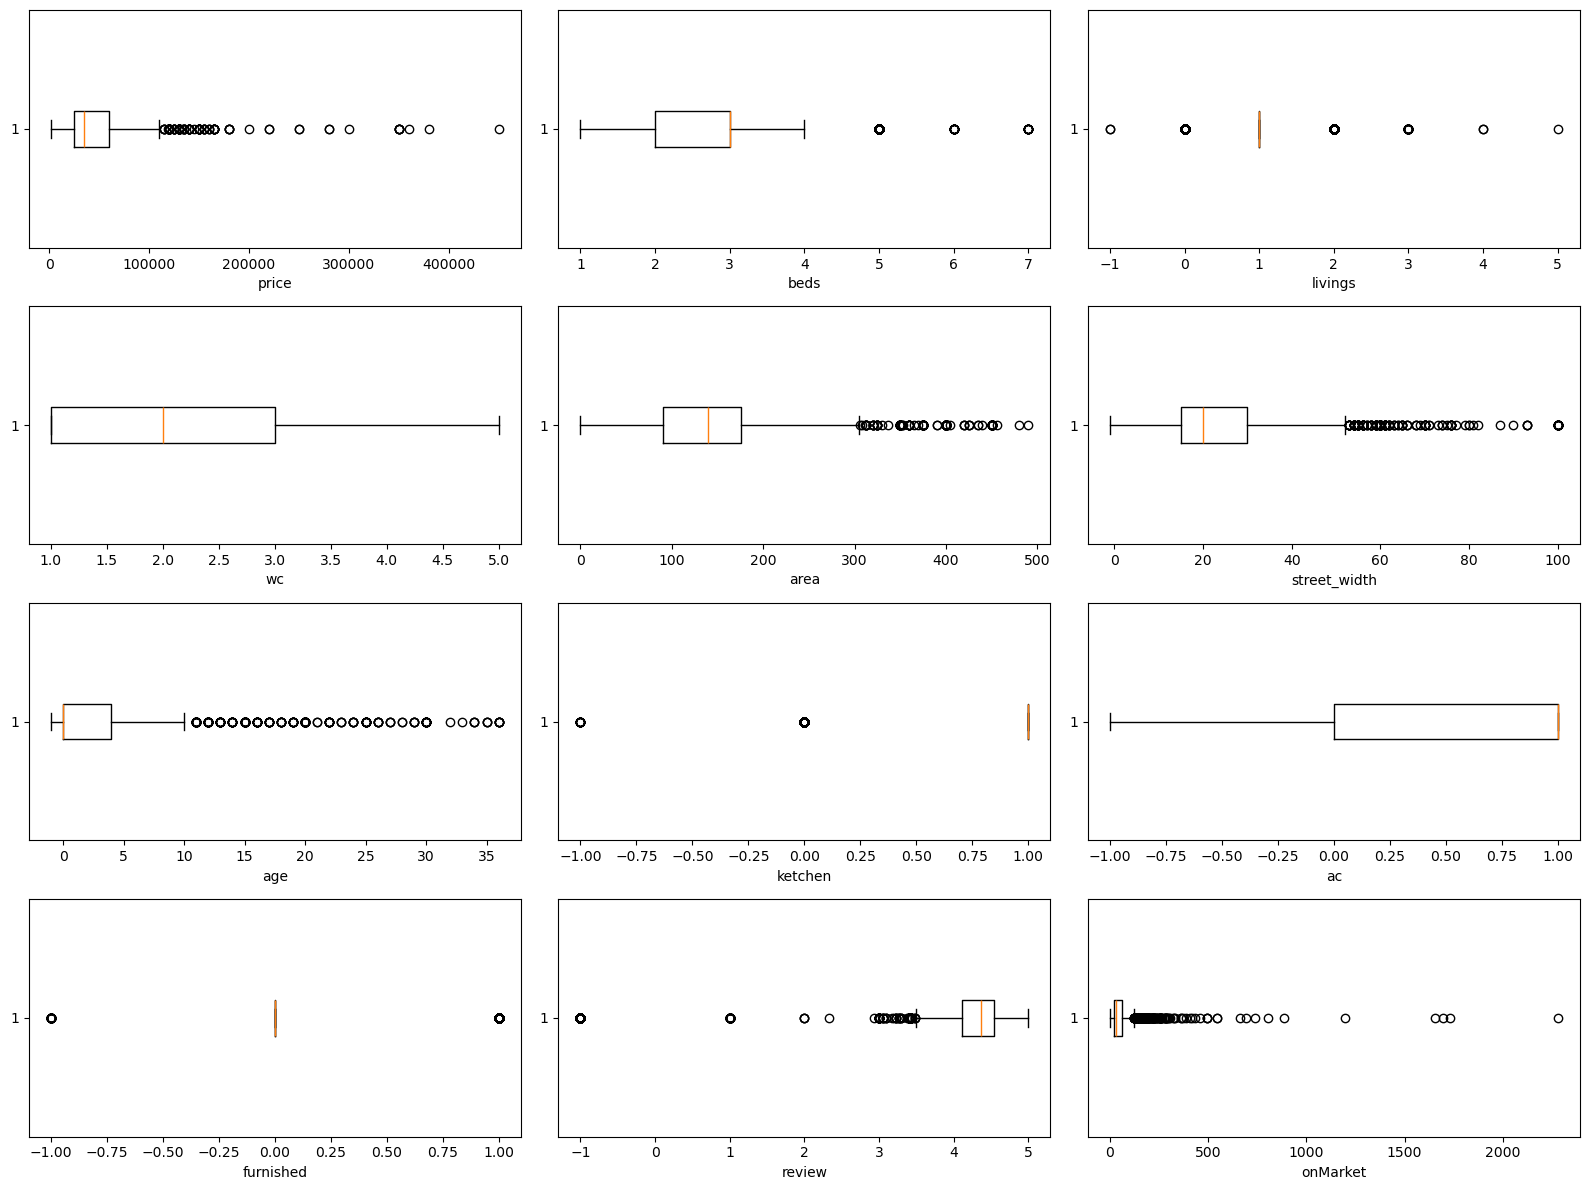

In [358]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named real_state
numerical_cols = real_estate.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(real_estate[col], vert=False)
    plt.xlabel(col)
plt.tight_layout()
plt.show()



In [359]:
land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [360]:
land_type = land['الغرض'].value_counts()

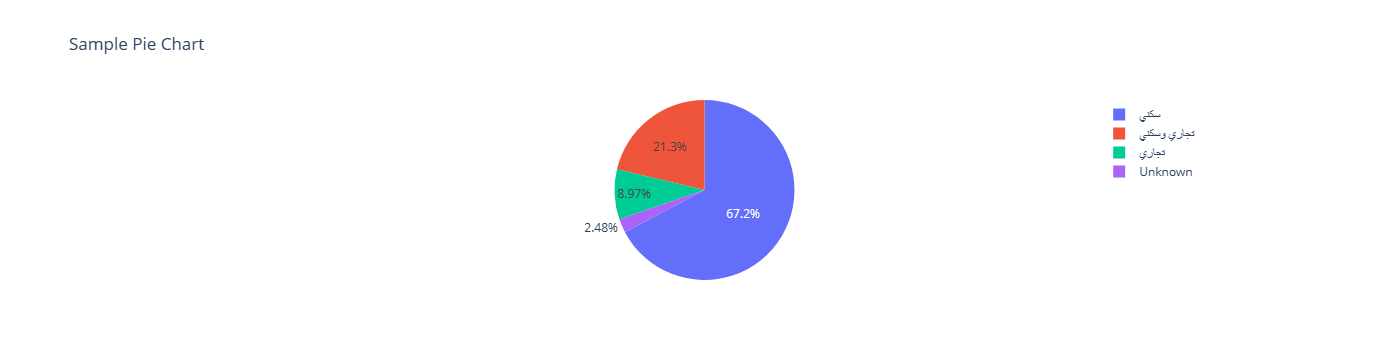

In [364]:
fig = px.pie(land_type, values=land_type.values, names=land_type.index, title='Sample Pie Chart')

# Show the pie chart
fig.show()

***********************************
#### Real Estate dataframe

In [366]:
real_estate_location = real_estate['location'].value_counts()

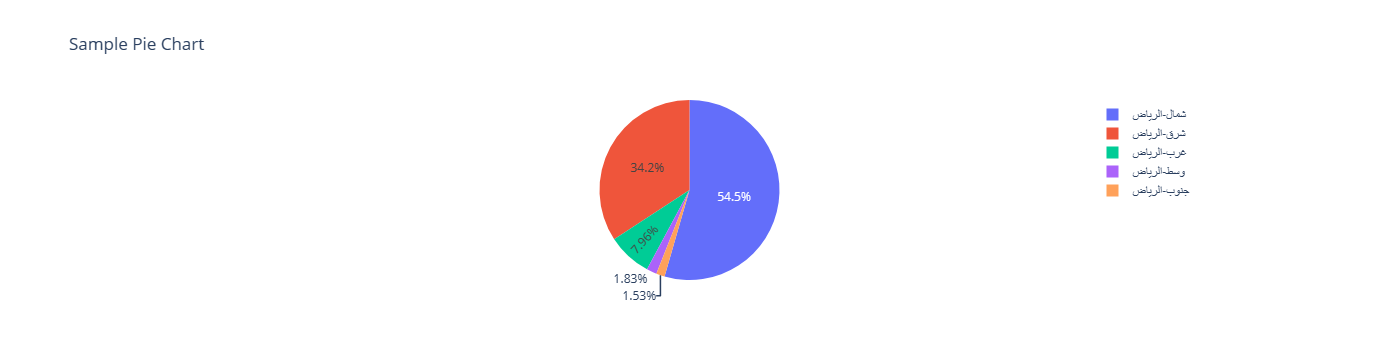

In [367]:
fig = px.pie(real_estate_location, values=real_estate_location.values, names=real_estate_location.index, title='Sample Pie Chart')

# Show the pie chart
fig.show()

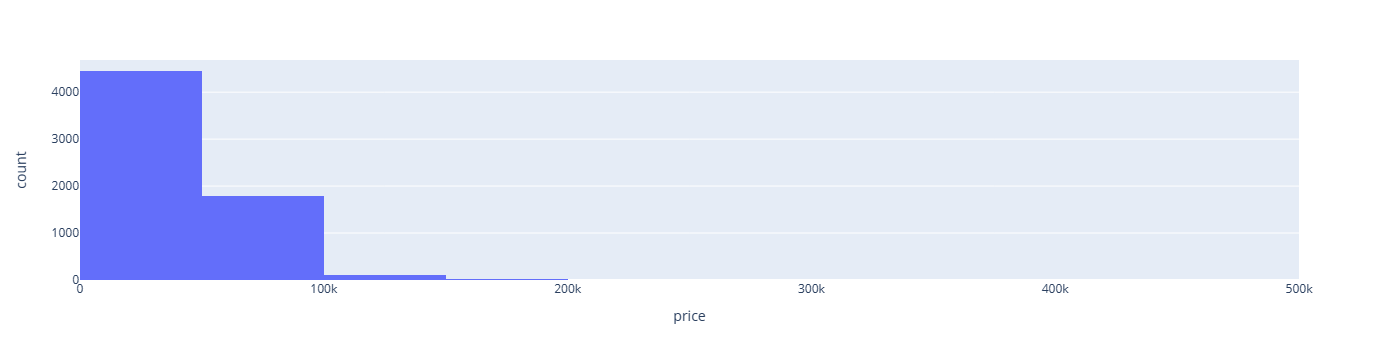

In [368]:
fig = px.histogram(real_estate, x='price', nbins=10, title='')

# Show the histogram
fig.show()

In [369]:
real_estate.head(1)

title  price      content  \
0  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000  1666 كل شهر   

   beds  livings  wc   area  street_width  age  ketchen   ac  furnished  \
0     3      0.0   2  225.0          15.0  9.0      1.0  0.0        0.0   

                                                path   district  \
0  /شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...  حي النظيم   

  advertiser_type  review iam_verified  onMarket  IsRent    location  
0           owner     5.0         True        17   False  شرق-الرياض

In [372]:
real_estate.columns

Index(['title', 'price', 'content', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'path', 'district',
       'advertiser_type', 'review', 'iam_verified', 'onMarket', 'IsRent',
       'location'],
      dtype='object')

In [377]:
real_estate_numric = ['price', 'beds', 'livings', 'wc', 'area', 'street_width', 'age', 'ketchen', 'ac', 'review', 'onMarket']

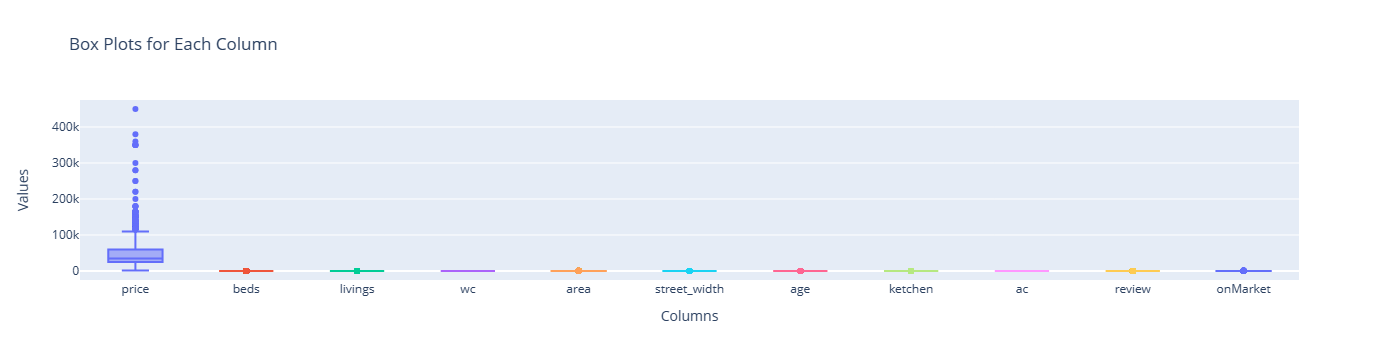

In [379]:
fig = go.Figure()

# Add a box plot for each column
for col in real_estate_numric:
    fig.add_trace(go.Box(y=real_estate[col], name=col))

# Update layout for better readability
fig.update_layout(title="Box Plots for Each Column",
                  yaxis_title="Values",
                  xaxis_title="Columns",
                  showlegend=False)

# Show the plot
fig.show()

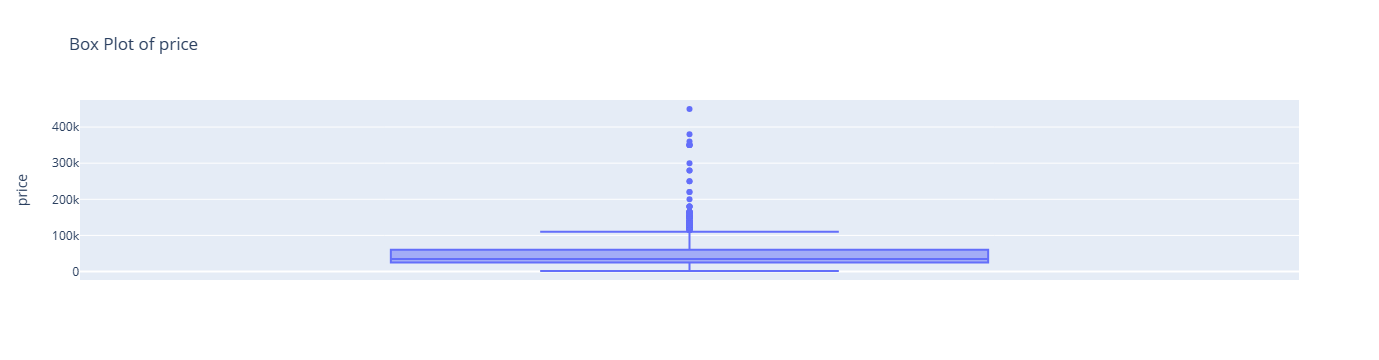

In [410]:
fig = px.box(real_estate, y='price', title='Box Plot of price')

# Show the plot
fig.show()

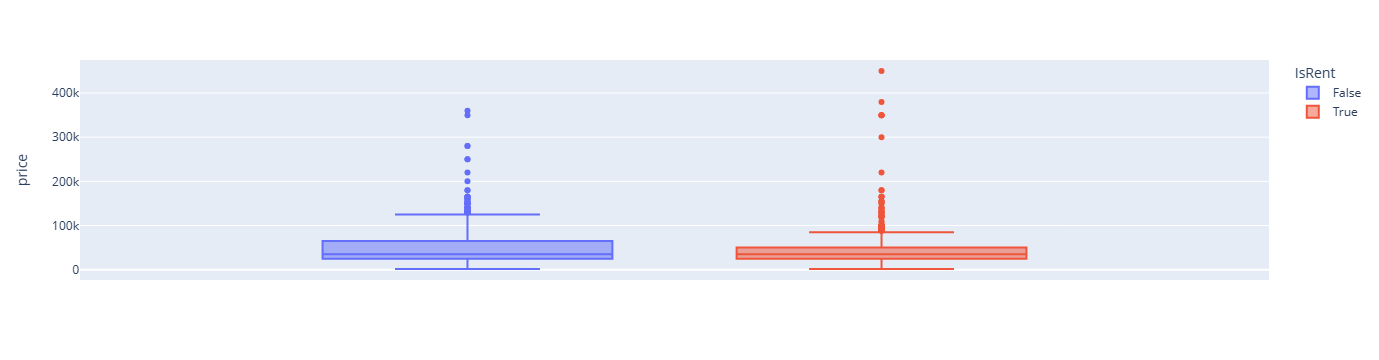

In [381]:
fig = px.box(
    real_estate,
    y="price",
    color="IsRent",
)


fig.show()

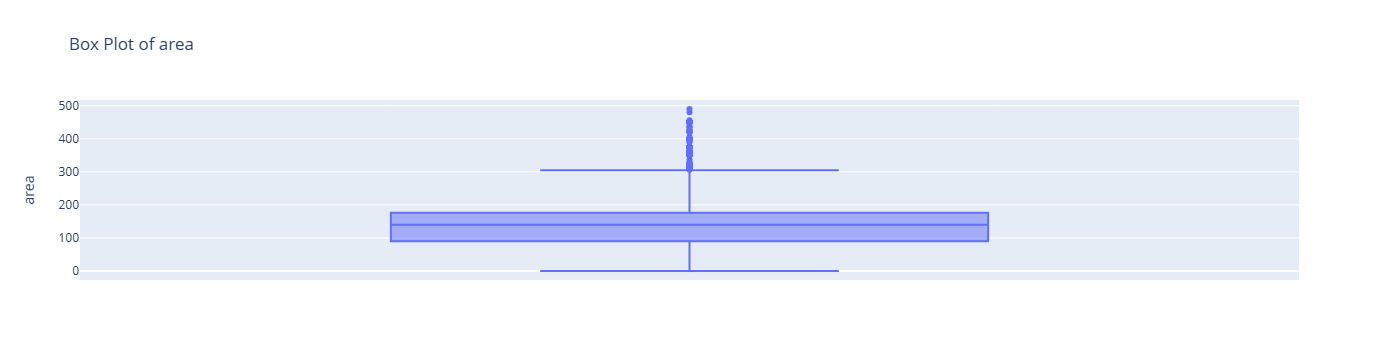

In [386]:
fig = px.box(real_estate[real_estate['area'] >= 0], y='area', title='Box Plot of area')

# Show the plot
fig.show()

In [388]:
real_estate[real_estate['area'] < 10]

title  price  \
11    شقة للإيجار في شارع الصحابة ، حي اليرموك ، الر...  27000   
15    شقة للإيجار في شارع الغاط ، حي التعاون ، الريا...  34000   
49    شقة للإيجار في شارع الصحابة ، حي المونسية ، ال...  24000   
110   شقة للإيجار في شارع عبدالكريم الصيرفي ، حي الن...  60000   
119   شقة للإيجار في شارع رقم 234 ، حي النرجس ، الري...  35000   
...                                                 ...    ...   
6639  شقة للإيجار في شارع ابن الجزري ، حي البيان ، ا...  23000   
6689  شقة للإيجار في شارع محمد بن عيسى ، حي النرجس ،...  45000   
6702  شقة للإيجار في شارع الزلال ، حي غرناطة ، الريا...  48000   
6703  شقة للإيجار في شارع الامير ناصر بن سعود بن فرح...  30000   
6729  شقة للإيجار في شارع الهجرة ، حي الصحافة ، الري...  26000   

                                                content  beds  livings  wc  \
11    شقه عوائل للايجار بحي اليرموك \r\nغرفتين وصاله...     2      1.0   1   
15    للايجار شقه عوائل بحي التعاون \r\nتتكون من : \...     3      1.0   2   
49    شقة للايجار في حي المونسية غرفتين وصاله وحمام ...     2      1.0   1   
110   شركه العالميه EG2 لعزل الاسطح\r\nhttps://maps....     2      1.0   2   
119   شقة ممتازة للايجار السنوي عوائل\r\nحي النرجس ش...     2      1.0   2   
...                                                 ...   ...      ...  ..   
6639  للتواصل واتساب فقط  تغريد محمد\r\n0581516408\r...     3      1.0   2   
6689  7340 فضيله الشيخ احمد عزت\r\nhttps://maps.app....     3      1.0   3   
6702  عرض \r\nالمواصفات / 4 غرف نوم منهم غرفه ماستر ...     4      2.0   3   
6703  شقه بموقع متميز بحي الصحافه قريبه من انس بن ما...     2      1.0   2   
6729  شقه للايجار  شقه للايجار  ♕ عوايل  حي الصحافة ...     1      1.0   1   

      area  street_width   age  ketchen   ac  furnished  \
11     8.0          29.0   0.0      1.0  1.0        0.0   
15     1.0          30.0  15.0      1.0  0.0        0.0   
49     1.0           1.0   2.0      1.0  1.0        0.0   
110    1.0          20.0   0.0      1.0  1.0        0.0   
119    1.0           5.0   4.0      1.0  1.0        0.0   
...    ...           ...   ...      ...  ...        ...   
6639   1.0          26.0   0.0      0.0  0.0        0.0   
6689   1.0          20.0   0.0      1.0  0.0        0.0   
6702   5.0           5.0  -1.0      0.0  1.0        0.0   
6703   4.0          32.0   4.0      1.0  1.0        0.0   
6729   2.0          45.0   4.0      1.0  1.0        0.0   

                                                   path     district  \
11    /شقق-للإيجار/الرياض/شرق-الرياض/حي-اليرموك/شارع...   حي اليرموك   
15    /شقق-للإيجار/الرياض/شمال-الرياض/حي-التعاون/شار...   حي التعاون   
49    /شقق-للإيجار/الرياض/شرق-الرياض/حي-المونسية/شار...  حي المونسية   
110   /شقق-للإيجار/الرياض/شمال-الرياض/حي-النرجس/شارع...    حي النرجس   
119   /شقق-للإيجار/الرياض/شمال-الرياض/حي-النرجس/شارع...    حي النرجس   
...                                                 ...          ...   
6639  /شقق-للإيجار/الرياض/شرق-الرياض/حي-الشرق/شارع-ا...     حي الشرق   
6689  /شقق-للإيجار/الرياض/شمال-الرياض/حي-النرجس/شارع...    حي النرجس   
6702  /شقق-للإيجار/الرياض/شرق-الرياض/حي-غرناطة/شارع-...    حي غرناطة   
6703  /شقق-للإيجار/الرياض/شمال-الرياض/حي-الصحافة/شار...   حي الصحافة   
6729  /شقق-للإيجار/الرياض/شمال-الرياض/حي-الصحافة/شار...   حي الصحافة   

         advertiser_type  review iam_verified  onMarket  IsRent     location  
11       normal_marketer    4.40         True        36    True   شرق-الرياض  
15       normal_marketer    2.33         True        16    True  شمال-الرياض  
49                 owner    4.59         True        19   False   شرق-الرياض  
110      normal_marketer    3.75         True        33   False  شمال-الرياض  
119      normal_marketer    4.35         True        40   False  شمال-الرياض  
...                  ...     ...          ...       ...     ...          ...  
6639               agent    4.73         True        20   False   شرق-الرياض  
6689     normal_marketer    3.75         True        17   False  شمال-الرياض  
6702  exclusive_marketer    4.36   

In [390]:
price_avg = real_estate[['price', 'location']]

In [392]:
price_avg =price_avg.groupby('location').mean('price')

In [394]:
price_avg

price
location                 
جنوب-الرياض  19210.204082
شرق-الرياض   32375.353397
شمال-الرياض  54143.487539
غرب-الرياض   30350.421569
وسط-الرياض   21141.444444

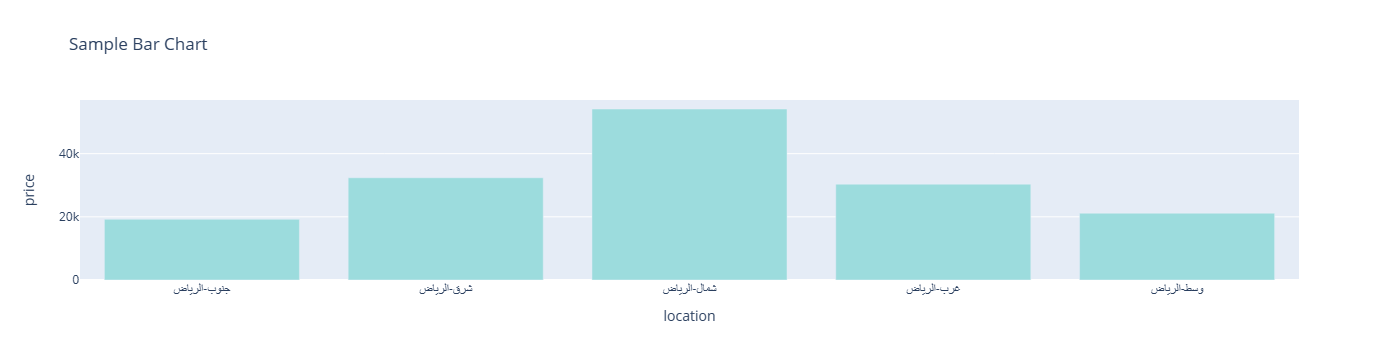

In [396]:
fig = px.bar(price_avg, x=price_avg.index, y='price', title='Sample Bar Chart', color_discrete_sequence=['#9cdcdd'])

# Show the bar chart
fig.show()

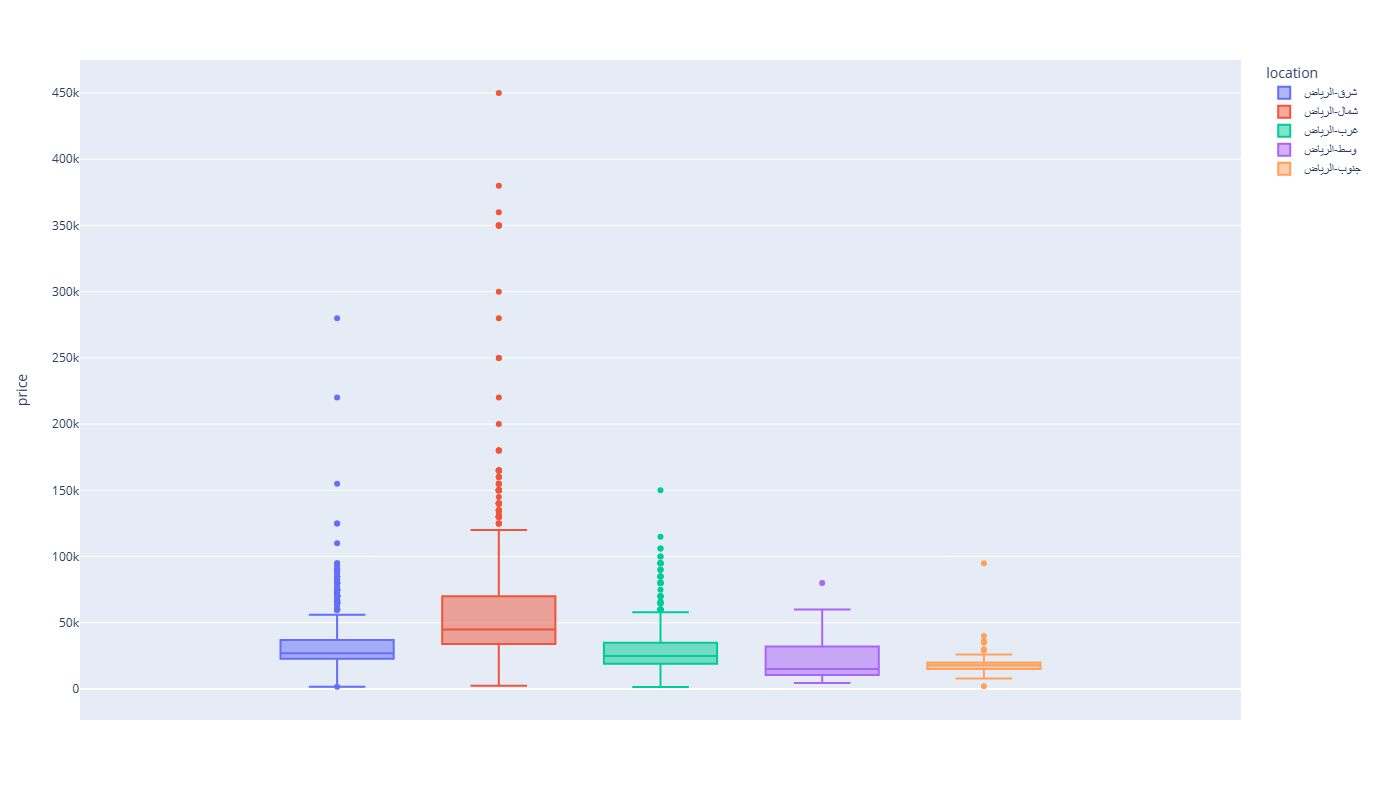

In [398]:
fig = px.box(
    real_estate,
    y="price",
    color="location",
)

fig.update_layout(
    width=1500,
    height=800
)

fig.show()

**********************************************
Aqqar villas dataframe

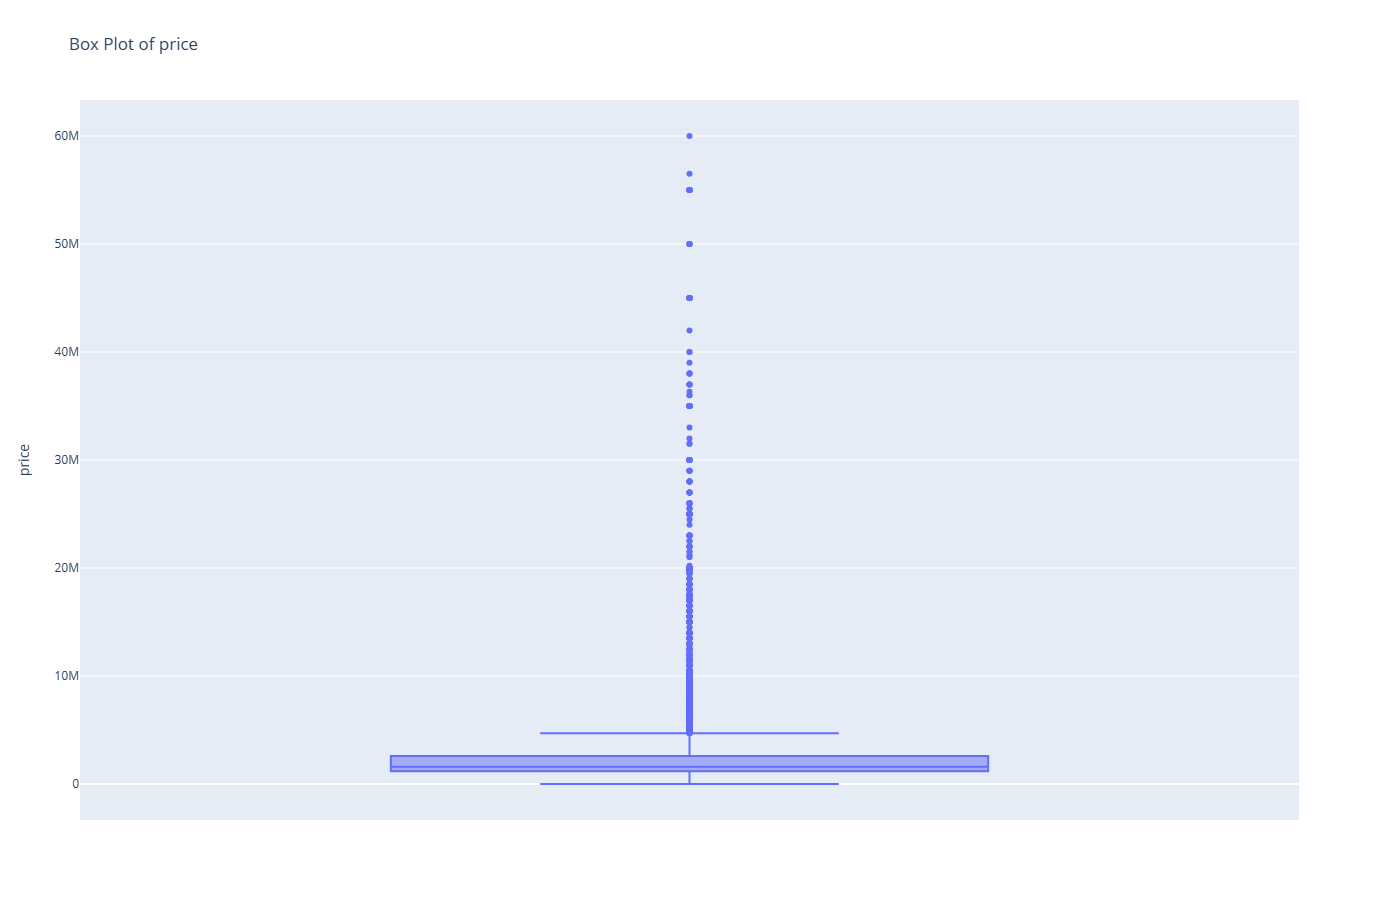

In [450]:
fig = px.box(aqqar_villas2, y='price', title='Box Plot of price')
fig.update_layout(
    width=1500,
    height=900
)
fig.show()

In [438]:
orginal_aqqar_villas2=aqqar_villas2.copy()

In [414]:
pd.set_option("display.max_columns", 25)

In [440]:
aqqar_villas2=aqqar_villas2[aqqar_villas2['price']<90000000]

In [442]:
aqqar_villas2.shape

(36182, 25)

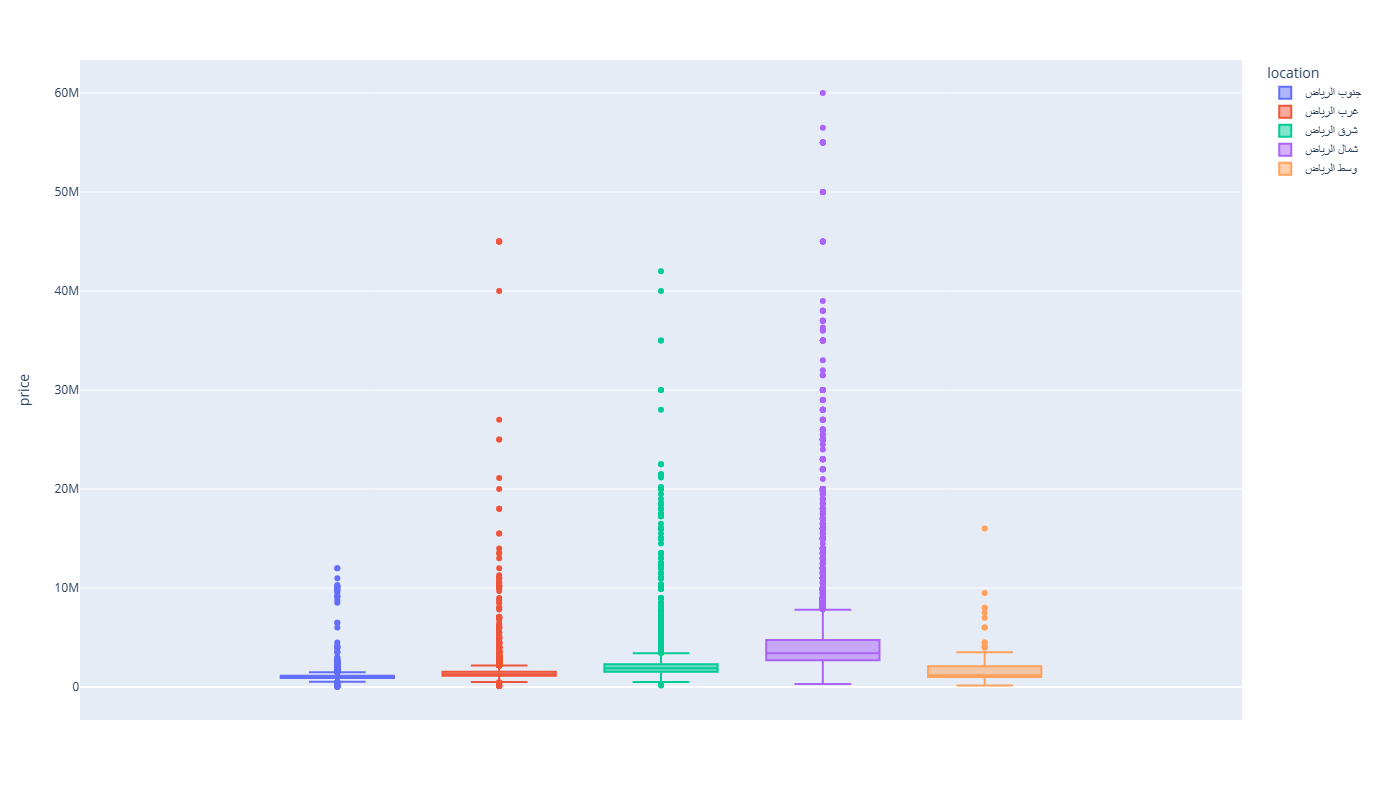

In [452]:
fig = px.box(
    aqqar_villas2,
    y="price",
    color="location",
)

fig.update_layout(
    width=1500,
    height=800
)

fig.show()

In [405]:
aqqar_villas2[aqqar_villas2['price'] > 90000000]

front  rooms  lounges  bathrooms  streetWidth  stairs  \
26898  أربع شوارع      7        5          5         18.0       1   

       propertyAge  driverRoom  tent  patio  ...  apartments  maidRoom  \
26898            0           1     1      1  ...           0         1   

       elevator  furnihsed  pool  basement  neighbourhood     location  \
26898         1          1     1         1           حطين  شمال الرياض   

             price  square price  
26898  100000000.0       10000.0  

[1 rows x 25 columns]

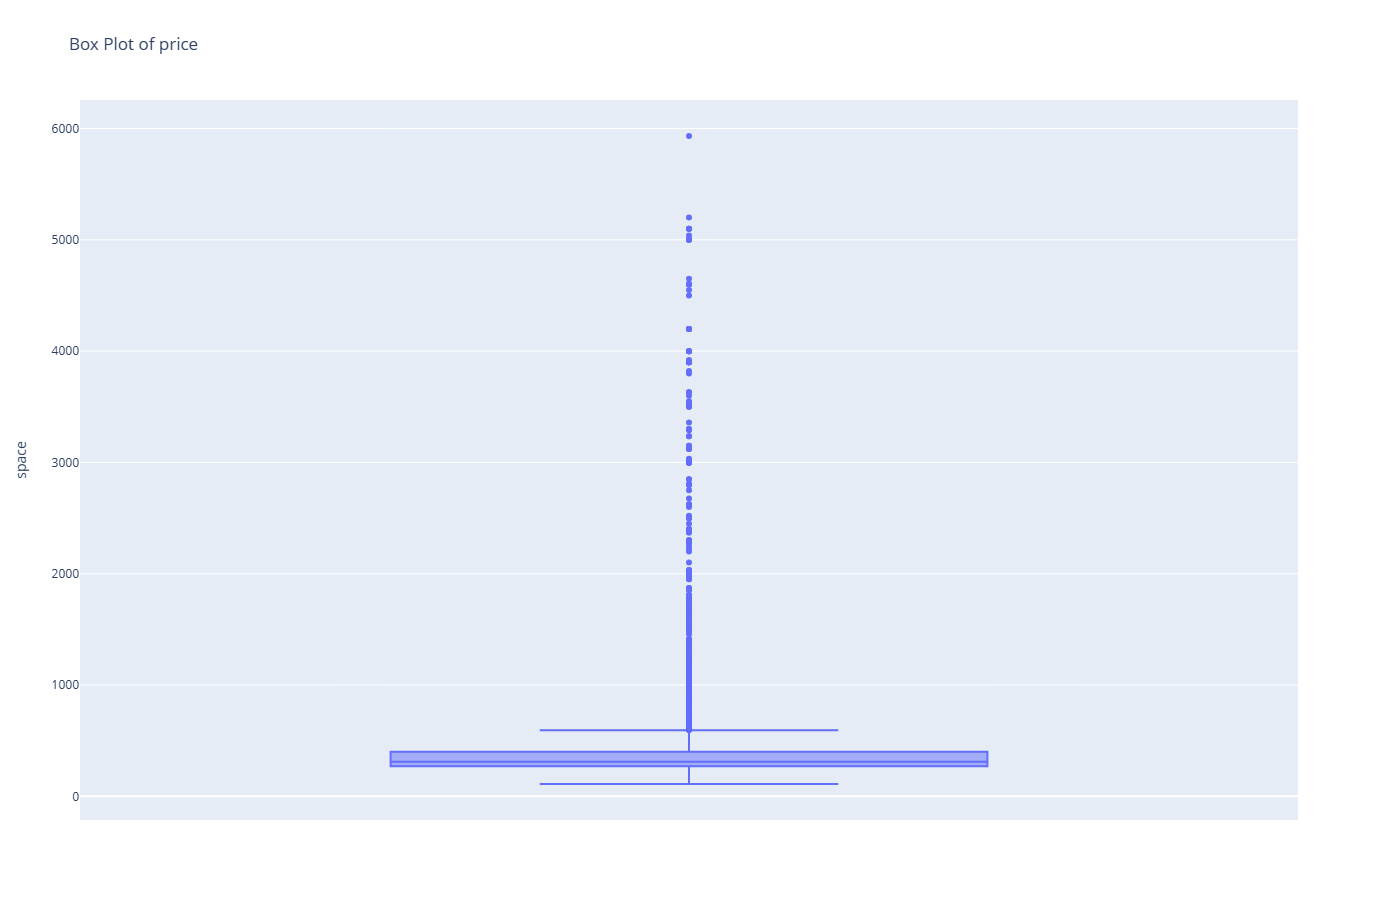

In [468]:
fig = px.box(aqqar_villas2, y='space', title='Box Plot of price')
fig.update_layout(
    width=1500,
    height=900
)
fig.show()

In [458]:
aqqar_villas2=aqqar_villas2[aqqar_villas2['space']<6000]

In [472]:
aqqar_villas2.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [466]:
aqqar_villas2=aqqar_villas2[aqqar_villas2['space']>100]

In [474]:
Vprice_avg = aqqar_villas2[['price', 'location']]

In [476]:
Vprice_avg =Vprice_avg.groupby('location').mean('price')

In [ ]:
fig = px.bar(Vprice_avg, x=Vprice_avg.index, y='price', title='Sample Bar Chart', color_discrete_sequence=['#9cdcdd'])

# Show the bar chart
fig.show()

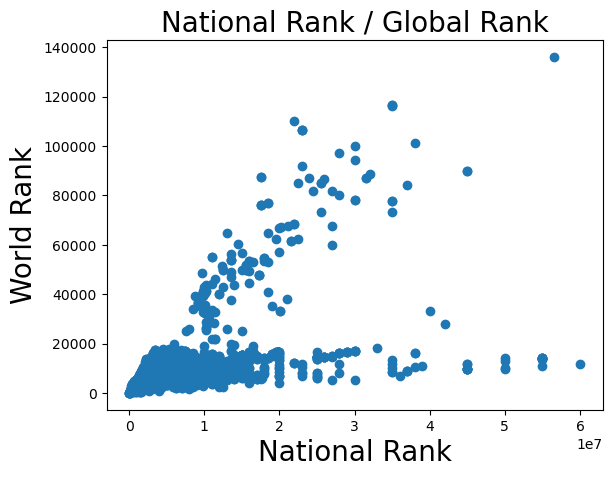

In [488]:
plt.scatter(aqqar_villas2['price'],aqqar_villas2['square price']) 
plt.title('National Rank / Global Rank',fontsize = 20)
plt.xlabel('National Rank',fontsize = 20)
plt.ylabel('World Rank',fontsize = 20)

plt.show()

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silen

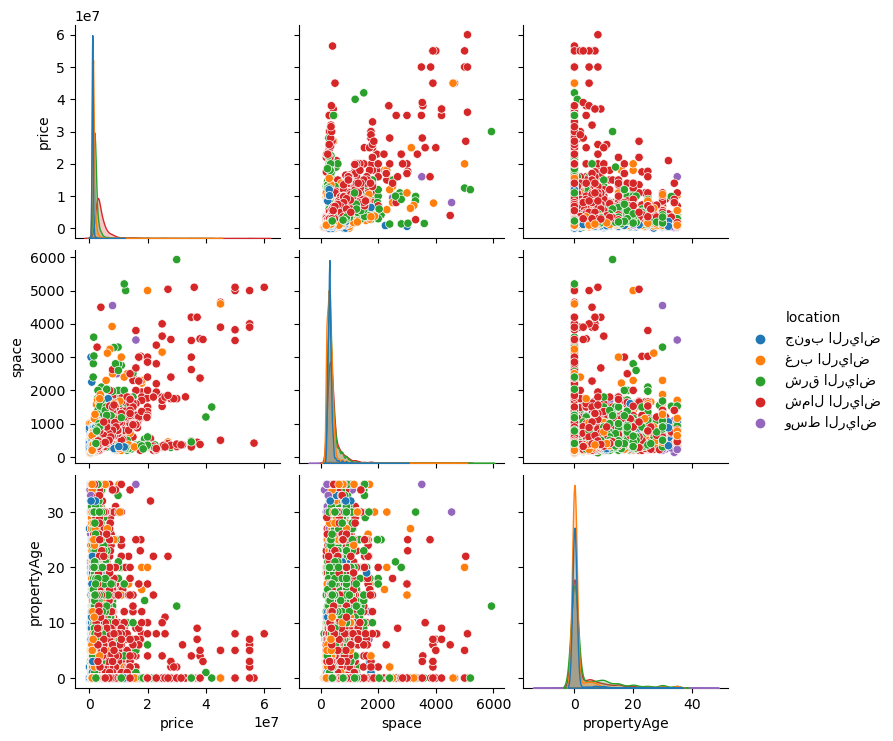

In [494]:
sns.pairplot(aqqar_villas2[['price', 'space', 'propertyAge', 'location']], hue="location");

In [ ]:
sns.pairplot(aqqar_villas2[['price', 'space',
                          'propertyAge']], 
             hue="location",
             # palette='coolwarm'
            );

KeyError: 'location'